In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Simple Linear Model

In [3]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201

# A vector of random x values
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
  return x * TRUE_W + TRUE_B

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y (y = 3x+b+noise)
y = f(x) + noise

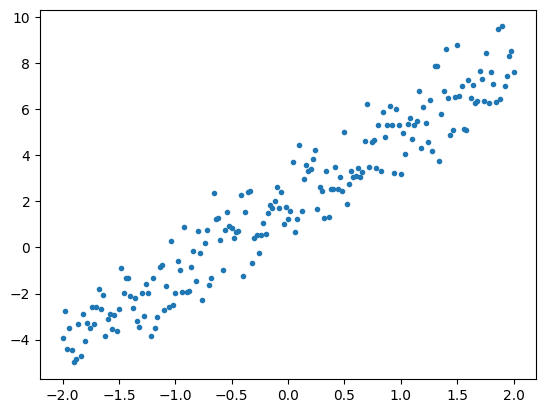

In [4]:
# Plot all the data
plt.plot(x, y, '.')
plt.show()

In [5]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


In [8]:
def MSELoss(y, y_pred):
  return tf.reduce_mean((y-y_pred)**2)

In [10]:
print(MSELoss(tf.constant([1,2]), tf.constant([2,3])))

tf.Tensor(1, shape=(), dtype=int32)


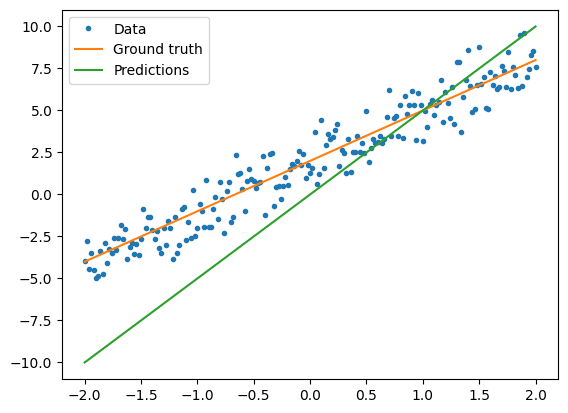

Current loss: 9.798375


In [12]:
plt.plot(x, y, '.', label="Data")
plt.plot(x, f(x), label="Ground truth")
plt.plot(x, model(x), label="Predictions")
plt.legend()
plt.show()

print("Current loss: %1.6f" % MSELoss(y, model(x)).numpy())

In [15]:
# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = MSELoss(y, model(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  dw, db = t.gradient(current_loss, [model.w, model.b])

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [16]:
model = MyModel()

# Collect the history of W-values and b-values to plot later
weights = []
biases = []
epochs = range(10)

# Define a training loop
def report(model, loss):
  return f"W = {model.w.numpy():1.2f}, b = {model.b.numpy():1.2f}, loss={loss:2.5f}"


def training_loop(model, x, y):

  for epoch in epochs:
    # Update the model with the single giant batch
    train(model, x, y, learning_rate=0.1)

    # Track this before I update
    weights.append(model.w.numpy())
    biases.append(model.b.numpy())
    current_loss = MSELoss(y, model(x))

    print(f"Epoch {epoch:2d}:")
    print("    ", report(model, current_loss))

In [17]:
current_loss = MSELoss(y, model(x))

print(f"Starting:")
print("    ", report(model, current_loss))

training_loop(model, x, y)

Starting:
     W = 5.00, b = 0.00, loss=9.79838
Epoch  0:
     W = 4.47, b = 0.38, loss=6.10230
Epoch  1:
     W = 4.09, b = 0.69, loss=3.99062
Epoch  2:
     W = 3.81, b = 0.93, loss=2.77465
Epoch  3:
     W = 3.60, b = 1.12, loss=2.06877
Epoch  4:
     W = 3.45, b = 1.28, loss=1.65562
Epoch  5:
     W = 3.35, b = 1.40, loss=1.41183
Epoch  6:
     W = 3.27, b = 1.50, loss=1.26681
Epoch  7:
     W = 3.21, b = 1.58, loss=1.17988
Epoch  8:
     W = 3.16, b = 1.65, loss=1.12737
Epoch  9:
     W = 3.13, b = 1.70, loss=1.09545
